In [11]:
import pandas as pd
import numpy as np
import os.path
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [18]:
list_of_files=glob.glob('./cdips_dell_test/*.txt')
df=pd.read_csv('featuretable.csv')
for i in range(len(list_of_files)):
    word=open(list_of_files[i],'r').read().strip('\n')
    df.loc[df.loc[:,'webpageID']==os.path.basename(list_of_files[i])[:7],'word']=word


df=df.fillna(' ')
df.head()


,webpageID,og:type,pagetype,salestype,country,language,og:type_salestype,label,word
0,000051_,category,category,config_category,us,en,category_config_category,0,for hours only get tremendous savings up to o...
1,000075_,product,product,franchise,us,en,product_franchise,1,for hours only get tremendous savings up to o...
2,000087_,category,category,parent_product_category,us,en,category_parent_product_category,2,dell o sign in click to chat or call us shop ...
3,000131_,product,product,franchise,us,en,product_franchise,1,for hours only get tremendous savings up to o...
4,000154_,product,product,franchise,us,en,product_franchise,1,dell o sign in click to chat or call us shop ...


In [23]:
X_train=df.loc[:,'word']
y_train=df.loc[:,'label'].astype(int)

In [26]:
stops=stopwords.words("english")
stops.append('dell')

porter= PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

vectorizer = TfidfVectorizer(analyzer='word',stop_words=stops,use_idf=True,\
                             tokenizer=tokenizer_porter, max_features= 200)
words_features = vectorizer.fit_transform(X_train)

In [27]:
words_features=words_features.toarray()
words_features.shape

(499, 200)

In [29]:
key_words = vectorizer.get_feature_names()
words_count=np.sum(words_features,axis=0)

In [42]:
scores=[]
scores_std=[]
N_trees=[5,10,20,30,40,50,100,150,200]
for n_tree in N_trees:
    randomforest=RandomForestClassifier(n_estimators=n_tree,n_jobs=-1)
    score=cross_val_score(estimator=randomforest,X=words_features,y=y_train,cv=10,n_jobs=-1)
    scores.append(np.mean(score))
    scores_std.append(np.std(score))

/Users/Meng/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/Users/Meng/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/Users/Meng/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/Users/Meng/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minim

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

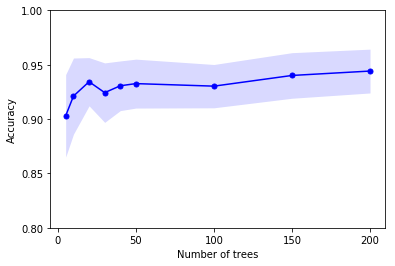

In [45]:
scores=np.array(scores)
scores_std=np.array(scores_std)
plt.plot(N_trees,scores,color='blue',marker='o',markersize='5')
plt.fill_between(N_trees,scores+scores_std,scores-scores_std,alpha=0.15,color='blue')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.ylim([0.8,1.0])
plt.show()